<a href="https://colab.research.google.com/github/deepraj16/50-days-of-deep-learning/blob/main/day22(Dog%20vs%20cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
#cnn model for given code working

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
! pip install opencv-python

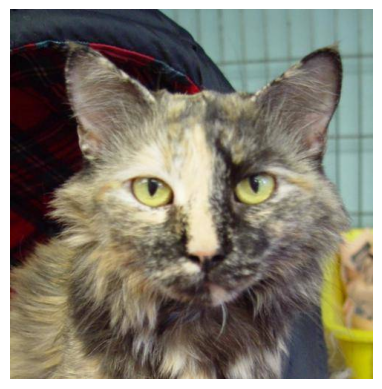

In [11]:
import cv2
img = cv2.imread("/content/test/cats/cat.10.jpg")  # Load an image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")  # Hide axis labels
plt.show()

In [ ]:
img2=cv2.imread("")